Question 1
(a) Generate a basic sinusoidal signal in the time domain. (For example, generate a sine wave with a frequency of 5 Hz, sampled at 1000 Hz.)

(b) Plot the time-domain waveform of the signal.


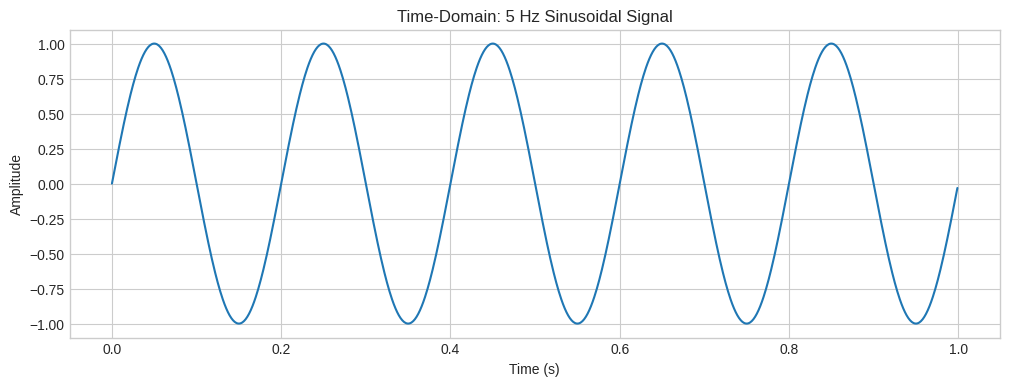

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Signal Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration of the signal in seconds
f = 5.0    # Frequency of the sine wave in Hz

# Generate Signal
# Create the time vector from 0 to 1 second
N = int(fs * T) # Total number of samples
t = np.linspace(0.0, T, N, endpoint=False)

# Create the sinusoidal signal: x(t) = sin(2 * pi * f * t)
x_sin = np.sin(2 * np.pi * f * t)

#  Plot Time-Domain Waveform
plt.figure(figsize=(12, 4))
plt.plot(t, x_sin)
plt.title('Time-Domain: 5 Hz Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Waveform: The smooth, repeating, and oscillating pattern is characteristic of a sine wave.
Frequency: You can see that the wave completes exactly five full cycles from the start (t=0) to the end (t=1.0 s). One cycle is a complete up-and-down motion. Since there are 5 cycles per second, the frequency of the signal is 5 Hertz (Hz).

Amplitude: The y-axis represents the amplitude. The wave reaches a maximum peak of +1.0 and a minimum trough of -1.0. This means the signal has an amplitude of 1.0.

Period: The period is the time it takes to complete one cycle. Since there are 5 cycles in 1 second, the period (T) is 1/5 = 0.2 seconds. You can see this on the x-axis, as the first full cycle ends at t=0.2 s.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

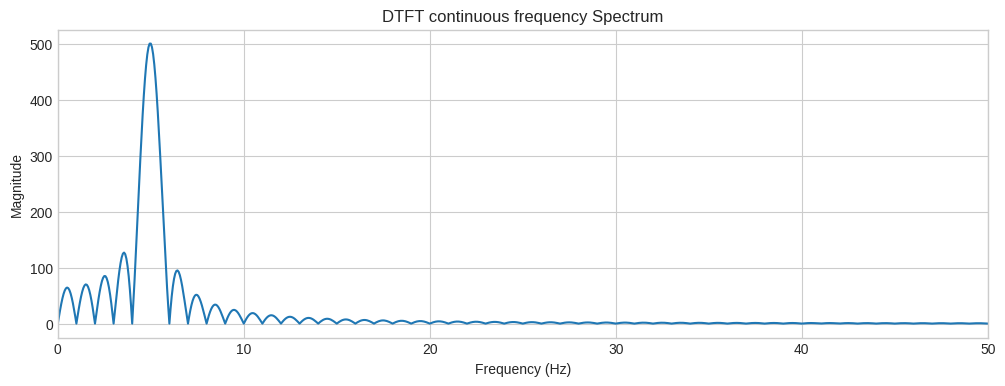

In [17]:
#  DTFT
# 'w' gives frequencies (radians/sample), 'h' gives the complex response.
w, h_dtft = freqz(x_sin, worN=8000)

# Convert frequency from radians/sample to Hz
freq_dtft = w * fs / (2 * np.pi)

#Plot DTFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, np.abs(h_dtft))
plt.title('DTFT continuous frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 50)
plt.grid(True)
plt.show()

Dominant Peak at 5 Hz: The most important feature is the massive, sharp peak located exactly at the 5 Hz mark on the x-axis. This indicates that almost all of the signal's energy is concentrated at this single frequency. This is the expected result, as the input signal was a pure 5 Hz sine wave. The DTFT has successfully identified the signal's core component.

Magnitude: The y-axis shows the strength, or magnitude, of each frequency component. The peak's height (around 500) shows that the 5 Hz component is overwhelmingly dominant.

Sidelobes (Ripples): The smaller ripples you see on either side of the main peak are a phenomenon known as spectral leakage. They occur because we are analyzing a finite, 1-second slice of the sine wave. This abrupt start and end of the signal causes its energy to "leak" slightly into adjacent frequencies, creating the sinc-like pattern.

 (d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

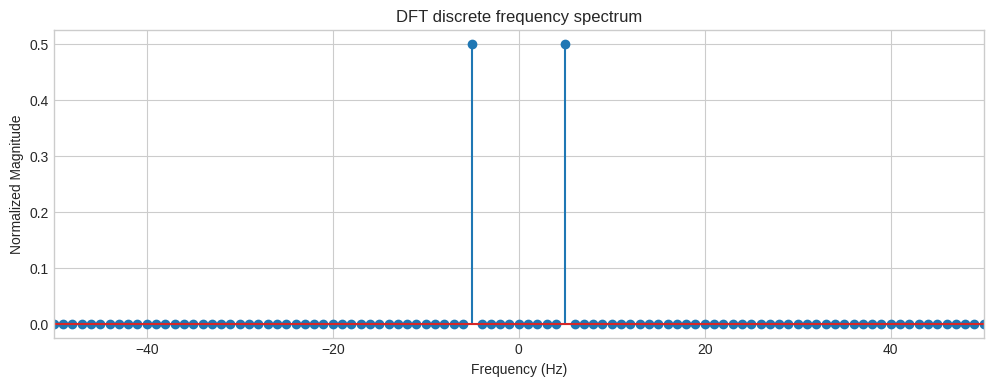

In [18]:
#  DFT Calculation using FFT
X_dft = np.fft.fft(x_sin)
freq_dft = np.fft.fftfreq(N, d=1/fs)


X_dft_magnitude = np.abs(X_dft)

# Shift the spectrum to center it around 0 Hz for easier viewing
X_dft_shifted = np.fft.fftshift(X_dft_magnitude)
freq_dft_shifted = np.fft.fftshift(freq_dft)

# Plot DFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
# Use a stem plot to emphasize the discrete nature
plt.stem(freq_dft_shifted, X_dft_shifted / N) # Normalize magnitude by N
plt.title('DFT discrete frequency spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()

Two Spikes: The spectrum consists of only two non-zero points. One is a sharp spike at +5 Hz and the other is an identical spike at -5 Hz. This tells us that the signal is composed exclusively of a 5 Hz frequency component.

Negative Frequency: The spike at -5 Hz is a mathematical necessity for real-valued signals. A real sine wave in the time domain is represented by two components in the complex frequency domain (one positive, one negative) that are equal in magnitude.

Normalized Magnitude: The y-axis shows a "Normalized Magnitude" of 0.5 for each spike. When you normalize the DFT by the number of samples (N), the magnitude of the peaks for a sine wave of amplitude A becomes A/2. Since our original sine wave had an amplitude of 1, the magnitude of 0.5 is the correct result (1 / 2 = 0.5).

Discrete Nature: The "stem" style of the plot (lines with dots) is used to emphasize that the DFT result is discrete—it provides values only at specific frequency intervals, and the magnitude is zero everywhere else.


Question 2
(a) Generate a composite signal by adding two or more sinusoidal signals of different frequencies and amplitudes.
(b) Plot the time-domain waveform of the composite signal.


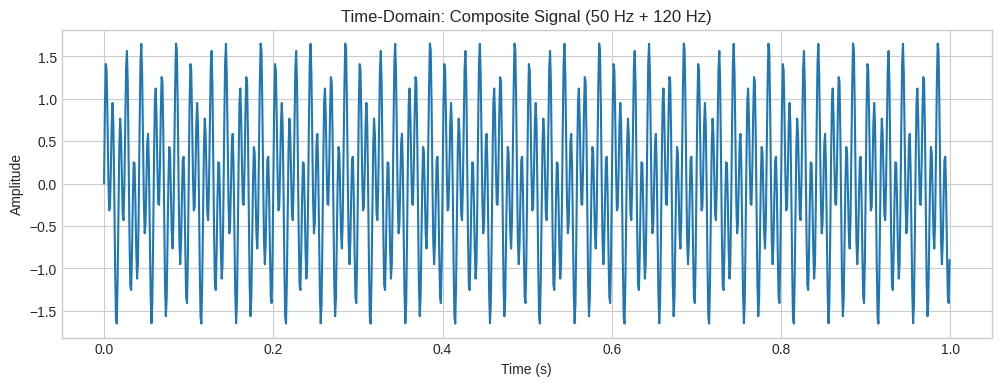

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Signal Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration of the signal in seconds
N = int(fs * T) # Total number of samples
t = np.linspace(0.0, T, N, endpoint=False)

# Parameters for the two sine waves
f1, A1 = 50.0, 0.7   # Freq = 50 Hz, Amp = 0.7
f2, A2 = 120.0, 1.0  # Freq = 120 Hz, Amp = 1.0

#  Generate Composite Signal
# Create the individual signals
x1 = A1 * np.sin(2 * np.pi * f1 * t)
x2 = A2 * np.sin(2 * np.pi * f2 * t)
# Add them to create the composite signal
x_composite = x1 + x2

# Plot Time-Domain Waveform
plt.figure(figsize=(12, 4))
plt.plot(t, x_composite)
plt.title('Time-Domain: Composite Signal (50 Hz + 120 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Complex Waveform: Unlike a simple sine wave, the waveform is complex and doesn't have a simple, regular pattern. This is because the two different frequencies are interfering with each other—sometimes they add up (constructive interference) and sometimes they cancel each other out (destructive interference).

Amplitude Variation: The amplitude of the wave is not constant. You can see it rapidly fluctuating between approximately -1.7 and +1.7. This occurs because the maximum possible amplitude is the sum of the individual amplitudes (0.7 + 1.0 = 1.7).

Underlying Frequencies: While it's difficult to distinguish the original 50 Hz and 120 Hz waves by just looking at the plot, their presence is what creates this intricate pattern. The faster, more frequent oscillations are due to the higher 120 Hz frequency, while the slower, overall modulation of the wave's envelope is influenced by the lower 50 Hz frequency.


(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

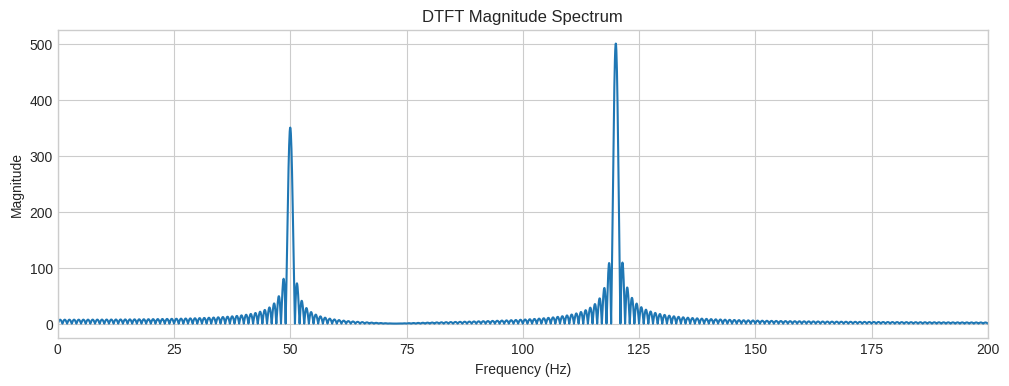

In [9]:
# DTFT Calculation
w, h_dtft_comp = freqz(x_composite, worN=8000)
freq_dtft_comp = w * fs / (2 * np.pi)

# Plot DTFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freq_dtft_comp, np.abs(h_dtft_comp))
plt.title('DTFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 200)
plt.grid(True)
plt.show()

Two Distinct Peaks: The plot shows two sharp, dominant peaks.

One peak is located at 50 Hz.

The other peak is located at 120 Hz.

Frequency Identification: These peaks perfectly correspond to the frequencies of the two original sine waves (50 Hz and 120 Hz) that were added together. The DTFT has successfully deconstructed the composite signal into its fundamental components.

Amplitude Correspondence: The y-axis shows the magnitude of each frequency component. The peak at 120 Hz is taller than the peak at 50 Hz. This reflects the original amplitudes of the sine waves, where the 120 Hz wave had an amplitude of 1.0 and the 50 Hz wave had an amplitude of 0.7.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

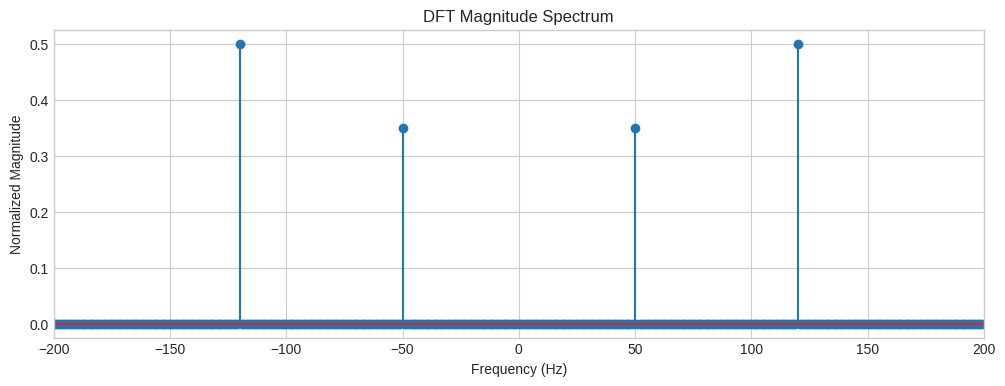

In [10]:
# DFT Calculation using FFT
X_dft_comp = np.fft.fft(x_composite)
freq_dft_comp = np.fft.fftfreq(N, d=1/fs)

# Shift and get magnitude
X_dft_comp_shifted = np.fft.fftshift(np.abs(X_dft_comp))
freq_dft_comp_shifted = np.fft.fftshift(freq_dft_comp)

# Plot DFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.stem(freq_dft_comp_shifted, X_dft_comp_shifted / N) # Normalize
plt.title('DFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.xlim(-200, 200)
plt.grid(True)
plt.show()

The plot clearly separates and identifies the two frequencies that were mixed together in the time domain.

Four Spikes: The spectrum has four distinct, non-zero spikes.

Two spikes are located at +50 Hz and -50 Hz.

The other two spikes are at +120 Hz and -120 Hz.

Frequency Identification: These pairs of spikes perfectly identify the two original sine waves (50 Hz and 120 Hz) that made up the composite signal. The negative frequencies are mathematical artifacts that appear when transforming real-valued signals.

Normalized Magnitude: The y-axis shows the normalized magnitude of each component.

The spikes at ±50 Hz have a magnitude of 0.35. This corresponds to the original amplitude of 0.7 (since 0.7 / 2 = 0.35).

The spikes at ±120 Hz have a magnitude of 0.5. This corresponds to the original amplitude of 1.0 (since 1.0 / 2 = 0.5).

 This confirms the linearity of the Fourier Transform, as the spectrum of the sum is the sum of the individual spectra.

Question 3
(a) Generate an exponentially decaying signal.

(b) Plot the time-domain waveform.


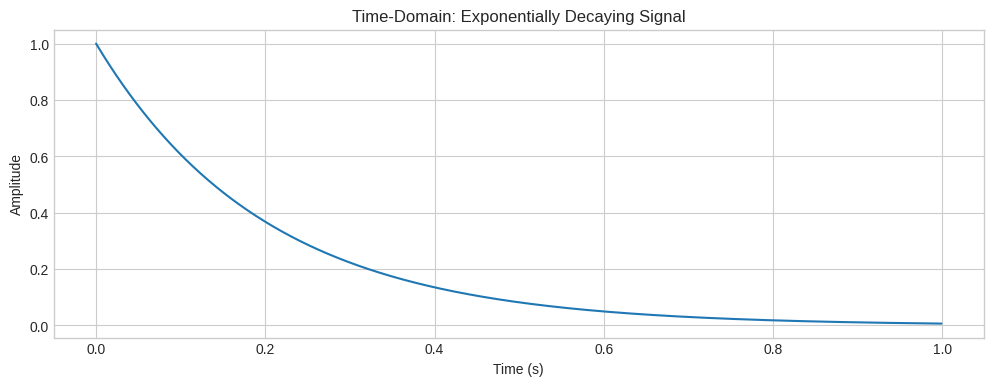

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

#  Signal Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration of the signal in seconds
N = int(fs * T) # Total number of samples
t = np.linspace(0.0, T, N, endpoint=False)

alpha = 5.0  # Decay constant

# Generate Exponentially Decaying Signal
x_exp = np.exp(-alpha * t)

# Plot Time-Domain Waveform
plt.figure(figsize=(12, 4))
plt.plot(t, x_exp)
plt.title('Time-Domain: Exponentially Decaying Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Waveform: The plot shows a curve that starts at its maximum amplitude of 1.0 at time t=0. It then decays smoothly towards zero as time increases.

Decay Rate: The "steepness" of the decay is controlled by a parameter often called alpha. A larger alpha would make the signal decay to zero much faster.

Localization in Time: This signal is considered "localized in time" because most of its energy is concentrated at the beginning (near t=0). It effectively disappears after a short duration.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

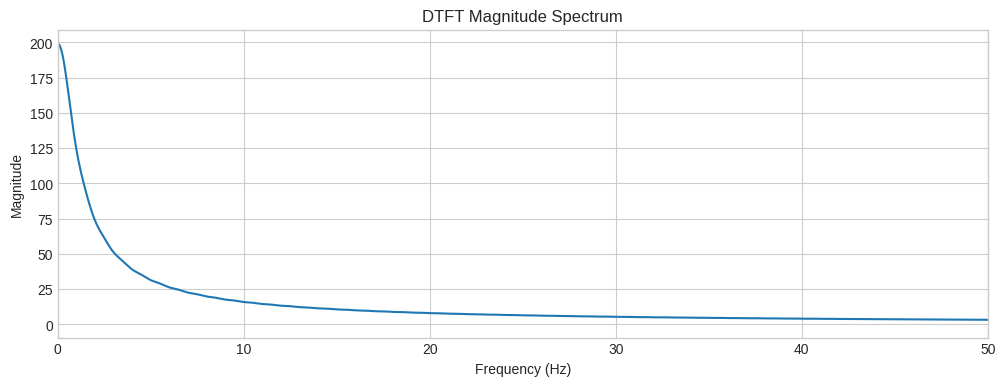

In [12]:
# DTFT
w, h_dtft_exp = freqz(x_exp, worN=8000)
freq_dtft_exp = w * fs / (2 * np.pi)

# Plot DTFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freq_dtft_exp, np.abs(h_dtft_exp))
plt.title('DTFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 50)
plt.grid(True)
plt.show()

Frequency Content: Unlike a sine wave which has a single sharp peak, the spectrum for the decaying exponential is a smooth, broad curve. This means the signal is composed of a wide range of frequencies, not just one.

Low-Frequency Dominance: The plot's magnitude is highest at 0 Hz and decreases as the frequency increases. This indicates that the low-frequency components are the most dominant, which gives the signal its smooth, non-oscillatory shape in the time domain.

Time-Frequency Relationship: This plot demonstrates a fundamental concept: a signal that is localized in time (like the exponential decay, which fades quickly) is spread out in frequency. To create a signal that changes rapidly and is short-lived, you need to combine a broad band of frequencies.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

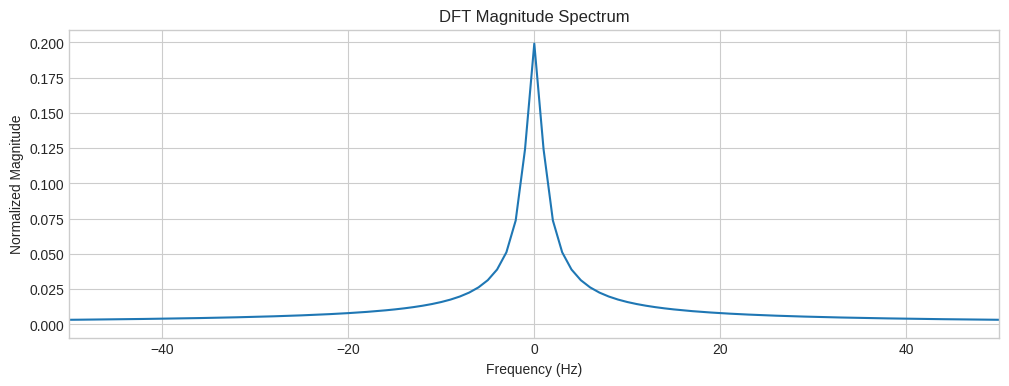

In [13]:
# DFT Calculation using FFT
X_dft_exp = np.fft.fft(x_exp)
freq_dft_exp = np.fft.fftfreq(N, d=1/fs)

# Shift and get magnitude
X_dft_exp_shifted = np.fft.fftshift(np.abs(X_dft_exp))
freq_dft_exp_shifted = np.fft.fftshift(freq_dft_exp)

#  Plot DFT Magnitude Spectrum
plt.figure(figsize=(12, 4))

plt.plot(freq_dft_exp_shifted, X_dft_exp_shifted / N)
plt.title('DFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()

Spectrum Shape: The plot shows a spectrum that is centered around 0 Hz. The shape is a sampled version of the smooth curve we saw in the DTFT plot, confirming that the signal is composed of many frequencies with a heavy emphasis on the low-frequency components.

Normalized Magnitude: The y-axis shows the normalized magnitude, with the peak at 0 Hz having the highest value. This peak represents the signal's DC offset or average value.

Discrete Representation: Although a line plot is used to show the overall shape, the DFT calculates the magnitude at discrete frequency points. The smooth curve is an interpolation between these points.

(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.

The Relationship
Time-Domain: Localized and Aperiodic
The time-domain plot shows a signal that is localized in time. Its energy is concentrated at the very beginning (near t=0) and it quickly fades away.

It is aperiodic, meaning it does not repeat.

It contains a rapid change right at the start.

Frequency-Domain: Spread Out and Low-Pass
The frequency-domain plot shows that the signal is spread out in frequency. Unlike a sine wave that has a single sharp peak, this signal's spectrum is a broad, smooth curve.

This indicates that to construct this rapidly changing, short-lived signal, we need to combine a wide range of frequencies.

The spectrum is strongest at 0 Hz and decays as frequency increases. This means the low-frequency components are the most dominant, which gives the signal its smooth, non-oscillating shape.

Question 4

(a) Generate a rectangular pulse signal of finite duration in the time domain.
(b) Plot the time-domain waveform.


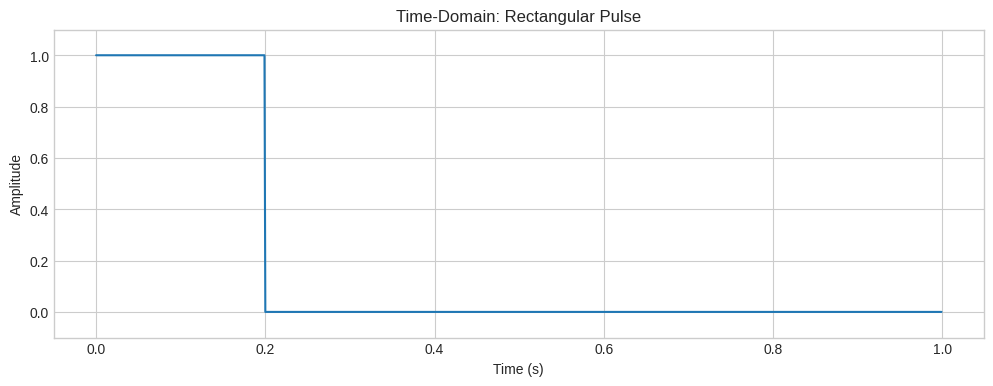

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

#  Signal Parameters
fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration of the signal in seconds
N = int(fs * T) # Total number of samples
t = np.linspace(0.0, T, N, endpoint=False)

# Generate Rectangular Pulse
# The pulse will be 'on' for the first 0.2 seconds (200 samples)
pulse_width = int(0.2 * fs)
x_rect = np.zeros(N)
x_rect[0:pulse_width] = 1.0

# Plot Time-Domain Waveform
plt.figure(figsize=(12, 4))
plt.plot(t, x_rect)
plt.title('Time-Domain: Rectangular Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.1) # Set y-limits for better visualization
plt.grid(True)
plt.show()


Waveform: The plot shows a signal that has a constant amplitude of 1.0 for a specific duration and is 0 everywhere else.

Duration: The signal starts at t=0, maintains its value of 1.0, and then instantly drops to 0 at t=0.2 seconds. It remains at 0 for the rest of the duration. This "on" time is the pulse width.

Discontinuities: The signal has sharp, instantaneous transitions at t=0 (from nothing to 1) and t=0.2 (from 1 to 0). These sharp edges, or discontinuities, have important implications in the frequency domain.


(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

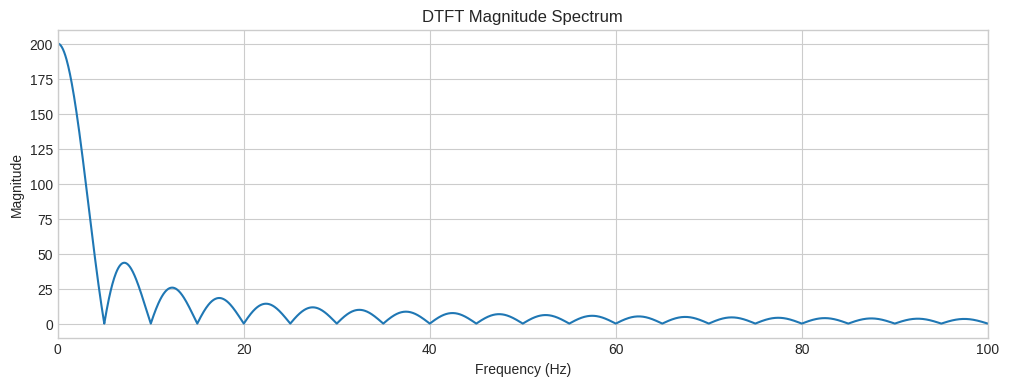

In [15]:
# DTFT Calculation
w, h_dtft_rect = freqz(x_rect, worN=8000)
freq_dtft_rect = w * fs / (2 * np.pi)

#  Plot DTFT Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freq_dtft_rect, np.abs(h_dtft_rect))
plt.title('DTFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

Sinc Function Shape: The spectrum has the characteristic shape of a sinc function (sinc(f)=πfsin(πf)​). This is the classic Fourier transform of a rectangular pulse. It features a large central peak, called the main lobe, followed by a series of smaller peaks, called sidelobes, that gradually decrease in magnitude.

Infinite Frequency Content: The lobes extend indefinitely, showing that to create the perfectly sharp edges of the rectangular pulse in the time domain, you need an infinite range of frequencies. A time-limited signal is not band-limited.

Main Lobe: The large main lobe, centered at 0 Hz, contains most of the signal's energy. The width of this lobe is inversely proportional to the pulse's duration; a narrower pulse in time would result in a wider main lobe in frequency.

 (d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

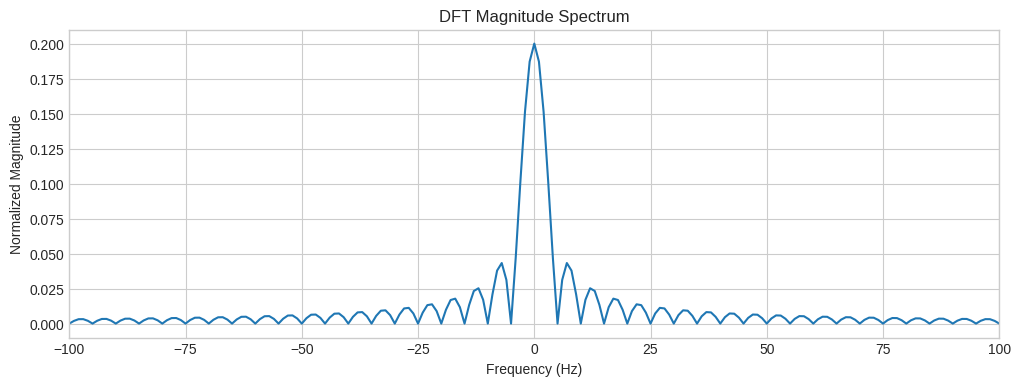

In [16]:
#  DFT Calculation using FFT
X_dft_rect = np.fft.fft(x_rect)
freq_dft_rect = np.fft.fftfreq(N, d=1/fs)

# Shift and get magnitude
X_dft_rect_shifted = np.fft.fftshift(np.abs(X_dft_rect))
freq_dft_rect_shifted = np.fft.fftshift(freq_dft_rect)

# Plot DFT Magnitude Spectrum
plt.figure(figsize=(12, 4))

plt.plot(freq_dft_rect_shifted, X_dft_rect_shifted / N)
plt.title('DFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude')
plt.xlim(-100, 100)
plt.grid(True)
plt.show()

Sinc Function Shape: The spectrum clearly shows the shape of a sinc function, which is the Fourier transform of a rectangular pulse. The plot is centered around 0 Hz.

Main and Side Lobes: You can see the large main lobe containing most of the signal's energy, followed by a series of smaller, decaying sidelobes on both sides.

Discrete Representation: Although a line plot is used to clearly show the sinc shape, the DFT itself calculates the magnitude at discrete frequency points.

Normalized Magnitude: The y-axis is normalized, with the peak of the main lobe having the highest value. This peak represents the DC component (average value) of the pulse.

 (e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.

Time-Domain: Perfectly Time-Limited
The time-domain plot shows a signal that is perfectly limited in time. It exists only for a finite duration (from 0 to 0.2 seconds) and is exactly zero everywhere else.

It contains discontinuities—instantaneous jumps from 0 to 1 and back to 0. These sharp edges are crucial.

 2.Frequency-Domain: Infinitely Spread Out
The frequency-domain plot shows the spectrum in the shape of a sinc function.
This sinc function, with its main lobe and infinite series of decaying sidelobes, is infinitely spread out in frequency.

To create the perfectly sharp edges of the pulse in the time domain, an infinite range of frequencies is required. The higher the frequency, the more it contributes to creating the "sharpness" of the corners.